# P7 Chapter 6 Case Study 2 589 Quakers and their family relationships #

## Thesis Chapter 6 Section 6.21 ##

File Name: jnb_hddt_quaker_tables

# 7.7.1 Import resources #

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community 
#This part of networkx, for community detection, needs to be imported separately.
import nbconvert
import seaborn as sns
plt.rc('figure', figsize=(20, 10))
# <img src=" xxx.png">

In [3]:
quakers = pd.read_csv ('vw_1_quakers.csv')
quakers['birth_year'] = quakers['death_year'].fillna(0).astype(np.int64)
quakers['death_year'] = quakers['death_year'].fillna(0).astype(np.int64)

quaker_relationships = pd.read_csv ('vw_5_person1_person2.csv')
immediate = pd.read_csv ('vw_5_quaker_relationships_3.csv')
close = pd.read_csv ('vw_5_quaker_relationships_2.csv')
distant = pd.read_csv ('vw_5_quaker_relationships_1.csv')

quaker_ceda = pd.read_csv('vw_4_ceda_membership_quakers2.csv')
quaker_aps = pd.read_csv ('vw_4_ceda_membership_quakers_aps2.csv')
quaker_esl = pd.read_csv('vw_4_ceda_membership_quakers_esl2.csv')
quaker_asl = pd.read_csv('vw_4_ceda_membership_quakers_asl2.csv')
quaker_ai = pd.read_csv('vw_4_ceda_membership_quakers_ai2.csv')
quaker_qca = pd.read_csv('vw_4_ceda_membership_quakers_qca2.csv')
quaker_hod = pd.read_csv('vw_4_ceda_membership_quakers_hod2.csv')
quaker_not_hod = pd.read_csv('vw_4_ceda_membership_quakers_not_hod2.csv')    

Quakers with CEDA memberships but without family relationships are circled in blue

Quakers begin their engagement with the Quaker Committee on the Aborigines. Led by Thomas Hodgkin MD (who can be seen in the centre of the graph) they then become members of the Aborigines Protection Society where they comprise 50% of the members. Some Quakers then go on to be members of the Ethnological Society of London, the Anthropological Society of London, and finally the Anthropological Institute. 

# 7.7.2 List out all Quakers in the database #

In [4]:
quakers

,Name,birth_year,death_year,data_source_id
0,William Aldam,1890,1890,1
1,S Stafford Allen,1870,1870,1
2,Edward Backhouse,1879,1879,1
3,James (1) Backhouse,1869,1869,1
4,James Bell,1872,1872,1
...,...,...,...,...
584,Joshua Wilson,0,0,3
585,F Woodhead,0,0,3
586,W Woolston,0,0,3
587,Francis Wright,0,0,3


# 7.7.3 List out all the Quaker family relationships #

In [5]:
quaker_relationships

,Source,Target,relationship_type_id
0,William Aldam,x Fox,1
1,William Jun Aldam,x Fox,1
2,Frederick Alexander,R D Alexander,1
3,G W Alexander,R D Alexander,1
4,Henry Alexander,R D Alexander,1
...,...,...,...
2001,Alfred Waterhouse,R Waterhouse,3
2002,Mary Waterhouse,Paul Bevan,3
2003,Lucy Westcombe,Thomas Westcombe,3
2004,Benjamin Wheeler,Samuel Wheeler,3


# 7.7.4 All Quaker family relationships #

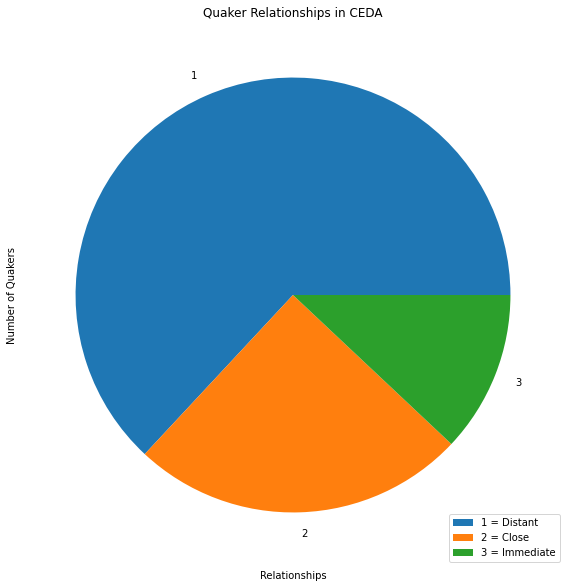

In [6]:
# quaker_relationships.groupby('relationship_type_id')['Source'].nunique().plot(kind='pie')
quaker_relationships.groupby('relationship_type_id')['Source'].count().plot(kind='pie')
plt.title ("Quaker Relationships in CEDA")
plt.xlabel ("Relationships")
plt.ylabel ("Number of Quakers")
plt.legend(["1 = Distant", "2 = Close", "3 = Immediate"], loc ="lower right")
plt.show()

# 7.7.5 Quakers and their family relationship networks #

<img src="quakers_dyn.png">

# 7.7.6 Immediate relationships #

In [7]:
immediate

,Source,Target,relationship_type_id
0,Arthur Albright,John M Albright,3
1,Arthur Albright,Rachel Albright,3
2,Arthur Albright,William Albright,3
3,Rachel Albright,John M Albright,3
4,Rachel Albright,William Albright,3
...,...,...,...
236,Alfred Waterhouse,R Waterhouse,3
237,Mary Waterhouse,Paul Bevan,3
238,Lucy Westcombe,Thomas Westcombe,3
239,Benjamin Wheeler,Samuel Wheeler,3


# 7.7.7 Close relationships #

In [8]:
close

,Source,Target,relationship_type_id
0,R D Alexander,Christopher Bowley,2
1,R D Alexander,Robert Charleton,2
2,R D Alexander,Frederick H Fox,2
3,R D Alexander,Thomas Maw,2
4,R D Alexander,William Norton,2
...,...,...,...
495,W Whiting,John Whiting,2
496,Isaac Wilson,S Braithwaite,2
497,Isaac Wilson,John Jowett,2
498,Isaac Wilson,John E Wilson,2


# 7.7.8 Distant relationships #

In [9]:
distant

,Source,Target,relationship_type_id
0,William Aldam,x Fox,1
1,William Jun Aldam,x Fox,1
2,Frederick Alexander,R D Alexander,1
3,G W Alexander,R D Alexander,1
4,Henry Alexander,R D Alexander,1
...,...,...,...
1260,William Wilson,Barnard Dickinson,1
1261,William Wilson,Frederick Fryer,1
1262,William Wilson,Benjamin Jowett (2),1
1263,William Wilson,John Pease,1


# 7.7.9 Significant personal networks - Thomas Hodgkin MD #

<img src="thomas_hodgkin.png">

# 7.7.10 Significant personal networks - John Hodgkin #

<img src="john_hodgkin.png">

# 7.7.11 Significant personal networks - Edward Backhouse #

<img src="edward_backhouse.png">

# 7.7.12 Significant personal networks - William Fowler #

<img src="william_fowler.png">

# 7.7.13 List out all Quaker members of the CEDA #

In [10]:
quaker_ceda

,Name,religion_name,ceda_name,first_year,last_year
0,William Spicer Wood,Quaker,APS,1864.0,1867.0
1,William Spicer Wood,Quaker,ASL,1863.0,1871.0
2,William Spicer Wood,Quaker,AI,1863.0,1871.0
3,William Wilson,Quaker,APS,1838.0,1865.0
4,William Wilson,Quaker,ASL,1865.0,1866.0
...,...,...,...,...,...
683,Joshua Wilson,Quaker,APS,1860.0,1860.0
684,F Woodhead,Quaker,APS,1861.0,1862.0
685,W Woolston,Quaker,APS,1861.0,1861.0
686,Francis Wright,Quaker,APS,1838.0,1838.0


# 7.7.14 Pie chart Quaker CEDA memberships #

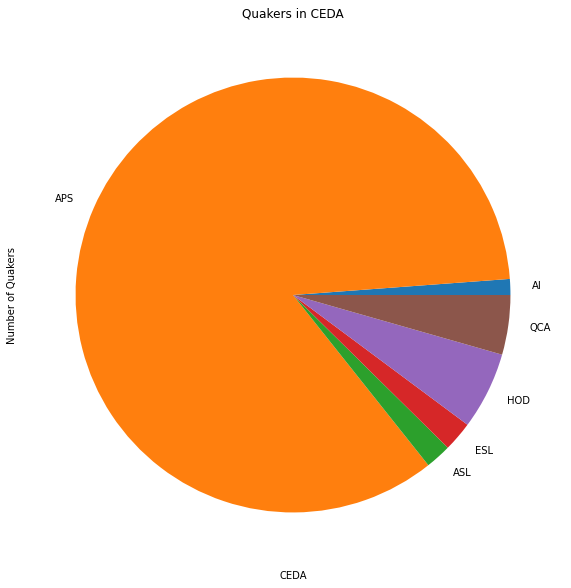

In [11]:
quaker_ceda.groupby('ceda_name')['Name'].nunique().plot(kind='pie')
plt.title ("Quakers in CEDA")
plt.xlabel ("CEDA")
plt.ylabel ("Number of Quakers")
plt.show()

# 7.7.15 Quaker CEDA membership networks #

<img src="quakers_ceda.png">

# 7.7.16 Quaker joiners of the CEDA by years #

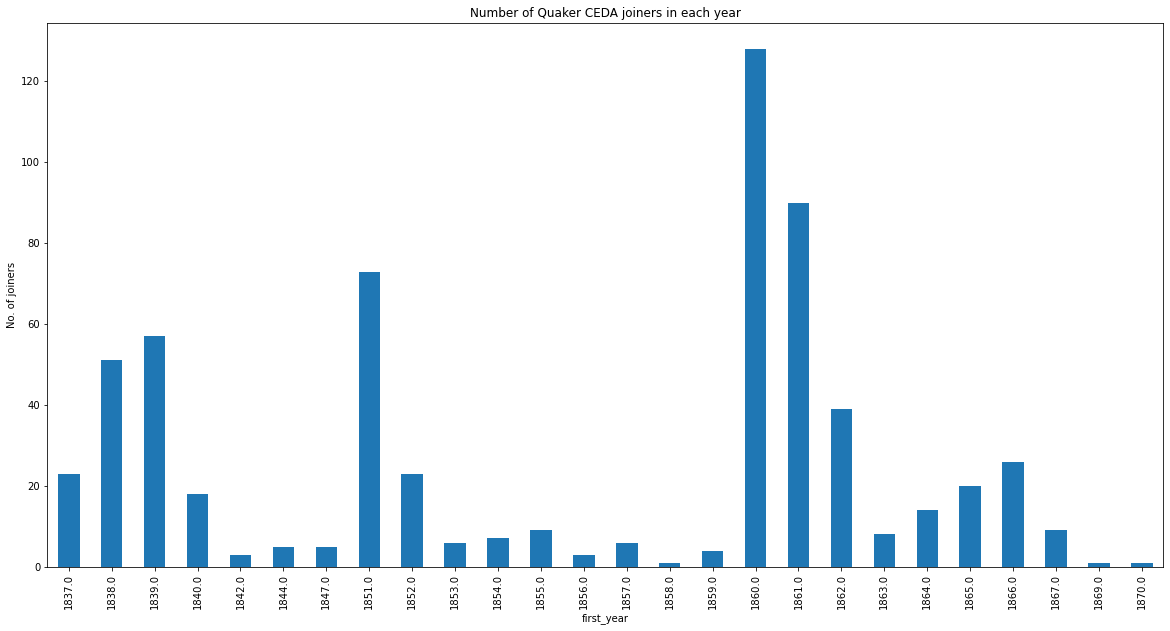

In [12]:
quaker_ceda.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker CEDA joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 7.7.17 Quaker leavers of the CEDA by years #

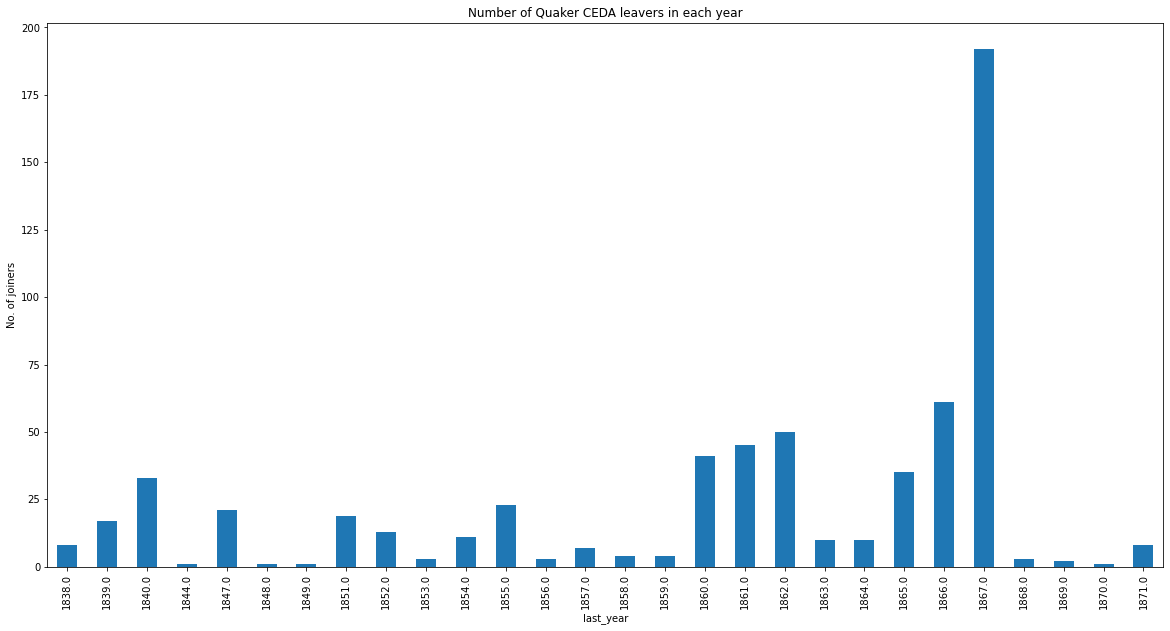

In [13]:
quaker_ceda.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker CEDA leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 7.7.18 Quaker members of the QCA #

In [14]:
quaker_qca

,Name,religion_name,ceda_name,first_year,last_year
0,Thomas (1) Hodgkin,Quaker,QCA,1839,1847
1,James Bowden,Quaker,QCA,1842,1847
2,William Nash,Quaker,QCA,1842,1847
3,Joseph Sturge,Quaker,QCA,1842,1847
4,William Jun Grimshaw,Quaker,QCA,1840,1847
5,Henry Knight,Quaker,QCA,1840,1847
6,Edward Paull,Quaker,QCA,1840,1847
7,Robert Jun Alsop,Quaker,QCA,1837,1847
8,Abram Rawlinson Barclay,Quaker,QCA,1837,1839
9,John Barclay,Quaker,QCA,1837,1839


# 7.7.19 Quaker joiners of the QCA in years #

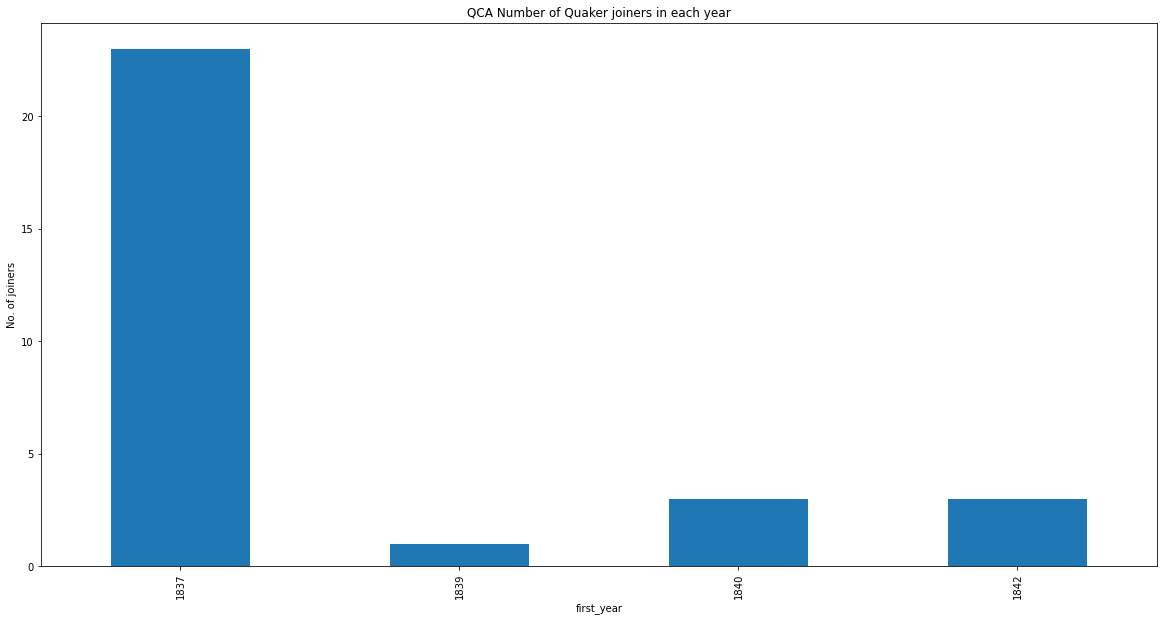

In [15]:
quaker_qca.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("QCA Number of Quaker joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 7.7.20 Quaker leavers of the QCA in years #

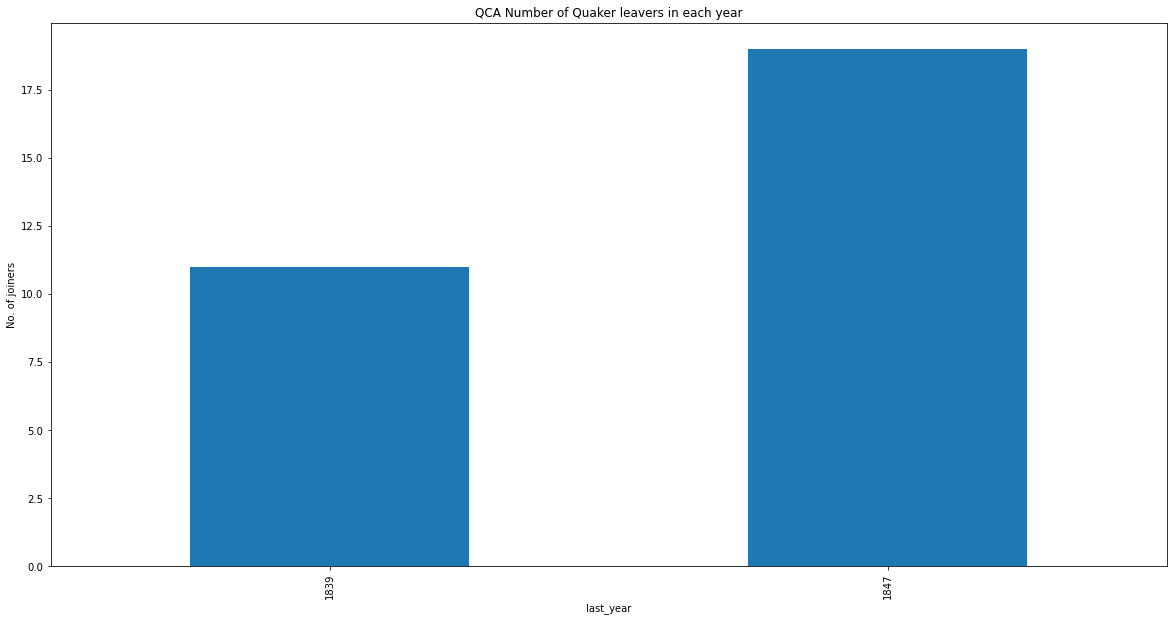

In [16]:
quaker_qca.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("QCA Number of Quaker leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 7.7.21 Show the Quaker members of the APS #

<img src="quakers_aps_dyn.png">

### Note Quakers make up roughly half of the members over all years ###

# 7.7.22 Quaker members of the APS - distant relationships #

<img src="quakers_aps_dyn1.png">

# 7.7.23 Quaker members of the APS - close relationships #

<img src="quakers_aps_dyn2.png">

# 7.7.24 Quaker members of the APS - immediate relationships #

<img src="quakers_aps_dyn3.png">

# 7.7.25 Show quaker members of the APS #

In [17]:
quaker_aps

,Name,religion_name,ceda_name,first_year,last_year
0,William Spicer Wood,Quaker,APS,1864,1867
1,William Wilson,Quaker,APS,1838,1865
2,James Wilson,Quaker,APS,1862,1867
3,E T Wakefield,Quaker,APS,1853,1864
4,John Ross,Quaker,APS,1839,1852
...,...,...,...,...,...
568,Joshua Wilson,Quaker,APS,1860,1860
569,F Woodhead,Quaker,APS,1861,1862
570,W Woolston,Quaker,APS,1861,1861
571,Francis Wright,Quaker,APS,1838,1838


<img src="quakers_aps_dyn.png">

# 7.7.26 Pie chart Quaker joiners of the APS #

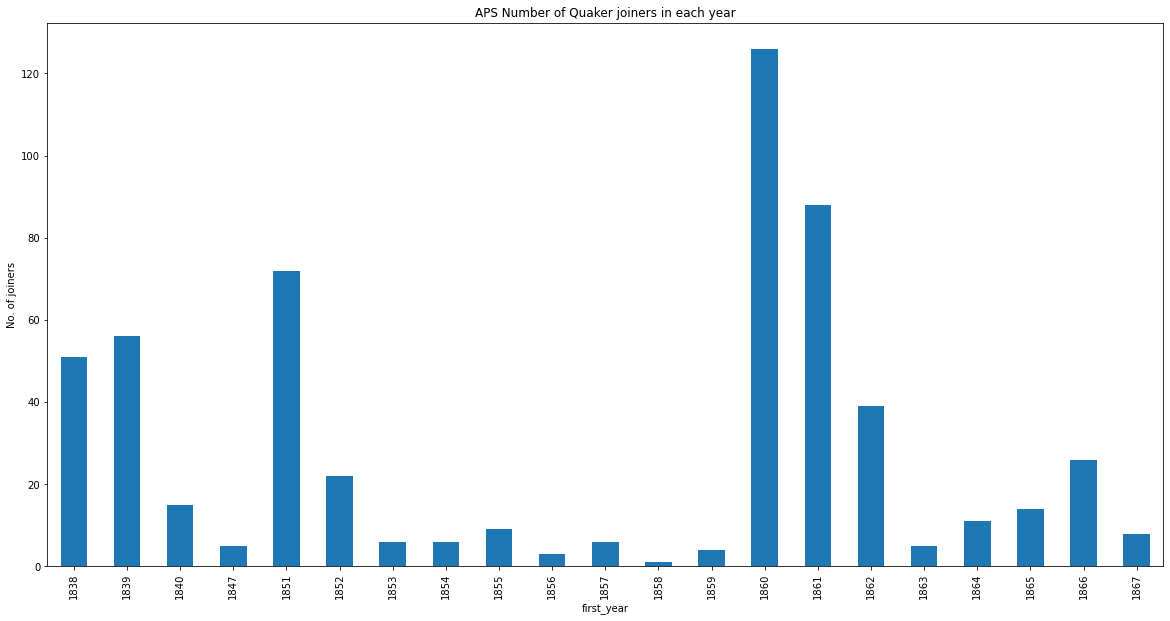

In [18]:
quaker_aps.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("APS Number of Quaker joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 7.7.27 Pie chart Quaker joiners of the APS #

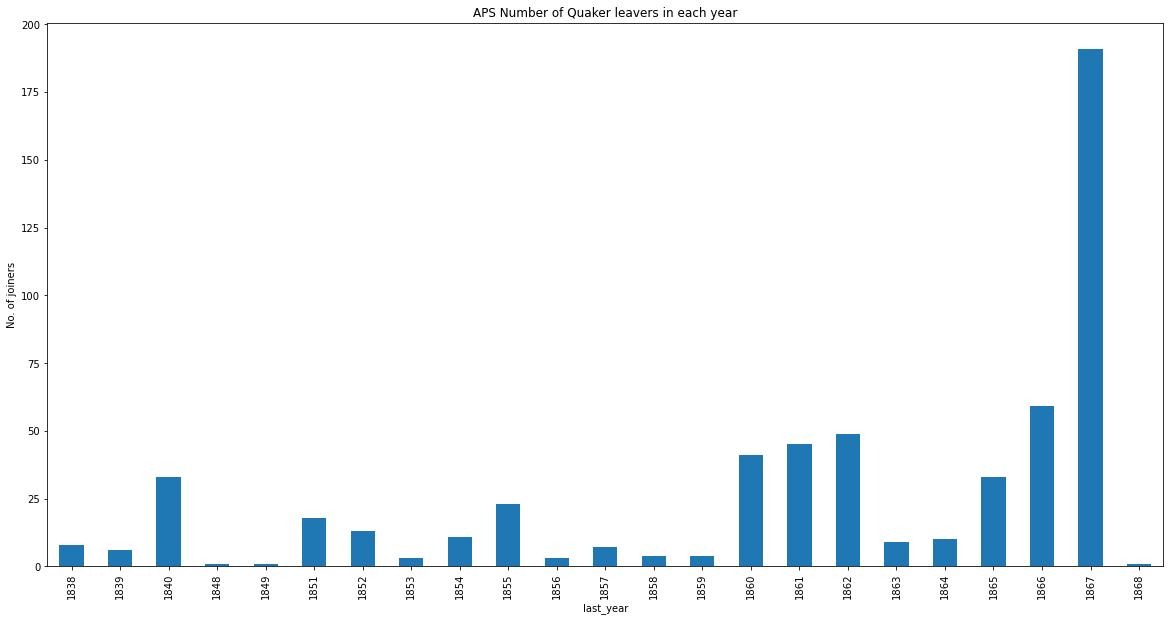

In [19]:
quaker_aps.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("APS Number of Quaker leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 7.7.28 Show Quaker members of the ESL #

In [20]:
quaker_esl

,Name,religion_name,ceda_name,first_year,last_year
0,William Horton Lloyd,Quaker,ESL,1844,1847
1,Joseph Lister,Quaker,ESL,1844,1847
2,Thomas (1) Hodgkin,Quaker,ESL,1844,1862
3,John Henry Gurney,Quaker,ESL,1860,1867
4,Charles Henry Fox,Quaker,ESL,1861,1871
5,William Fowler,Quaker,ESL,1851,1851
6,Robert Nicholas Fowler,Quaker,ESL,1851,1871
7,David Dale,Quaker,ESL,1860,1863
8,x Collier,Quaker,ESL,1844,1844
9,William Clay,Quaker,ESL,1861,1868


# 7.7.29 Show Quaker joiners of the ESL #

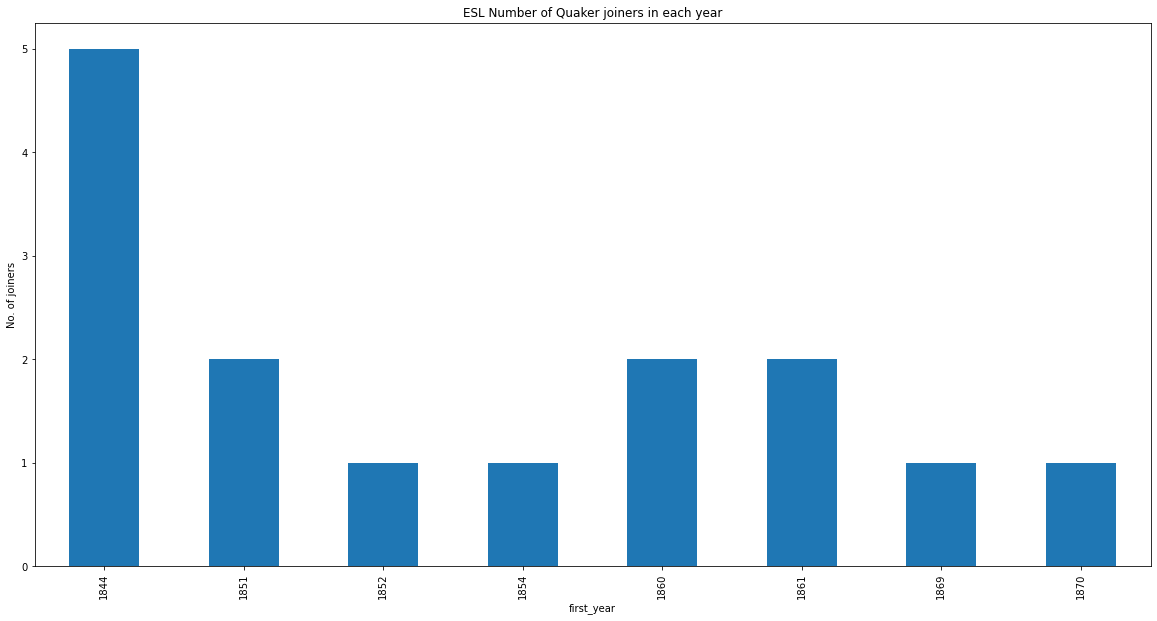

In [21]:
quaker_esl.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("ESL Number of Quaker joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 7.7.30 Show Quaker joiners of the ESL #

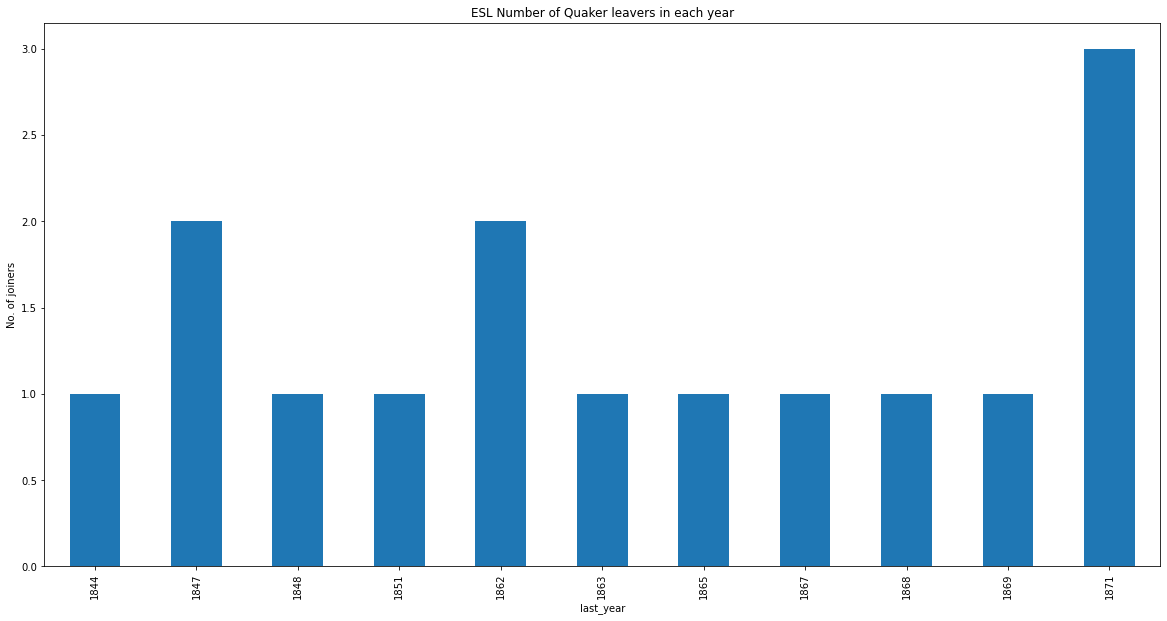

In [22]:
quaker_esl.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("ESL Number of Quaker leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 7.7.31 Show Quaker members of the ASL #

In [23]:
quaker_asl

,Name,religion_name,ceda_name,first_year,last_year
0,William Spicer Wood,Quaker,ASL,1863,1871
1,William Wilson,Quaker,ASL,1865,1866
2,James Wilson,Quaker,ASL,1865,1865
3,E T Wakefield,Quaker,ASL,1865,1868
4,J Robinson,Quaker,ASL,1865,1865
5,Jonathan Hutchinson,Quaker,ASL,1863,1871
6,William Holmes,Quaker,ASL,1865,1869
7,George Stacey Gibson,Quaker,ASL,1864,1866
8,James T J Doyle,Quaker,ASL,1865,1868
9,Henry Crowley,Quaker,ASL,1864,1871


# 7.7.32 Show quaker joiners of the ASL #

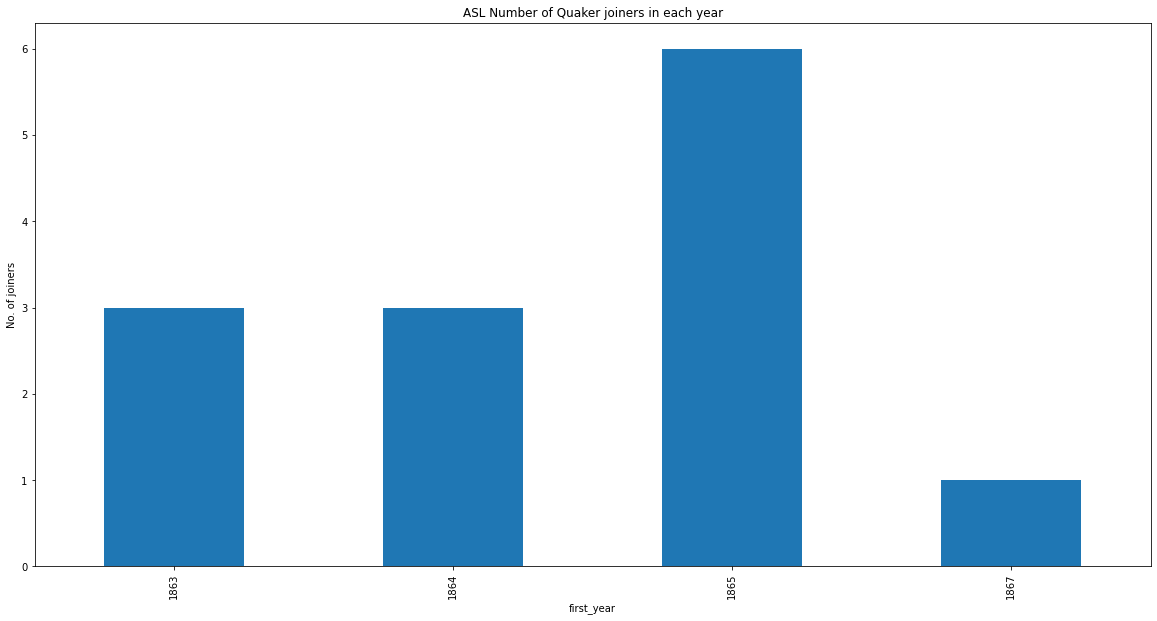

In [24]:
quaker_asl.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("ASL Number of Quaker joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 7.7.33 Show quaker joiners of the ASL #

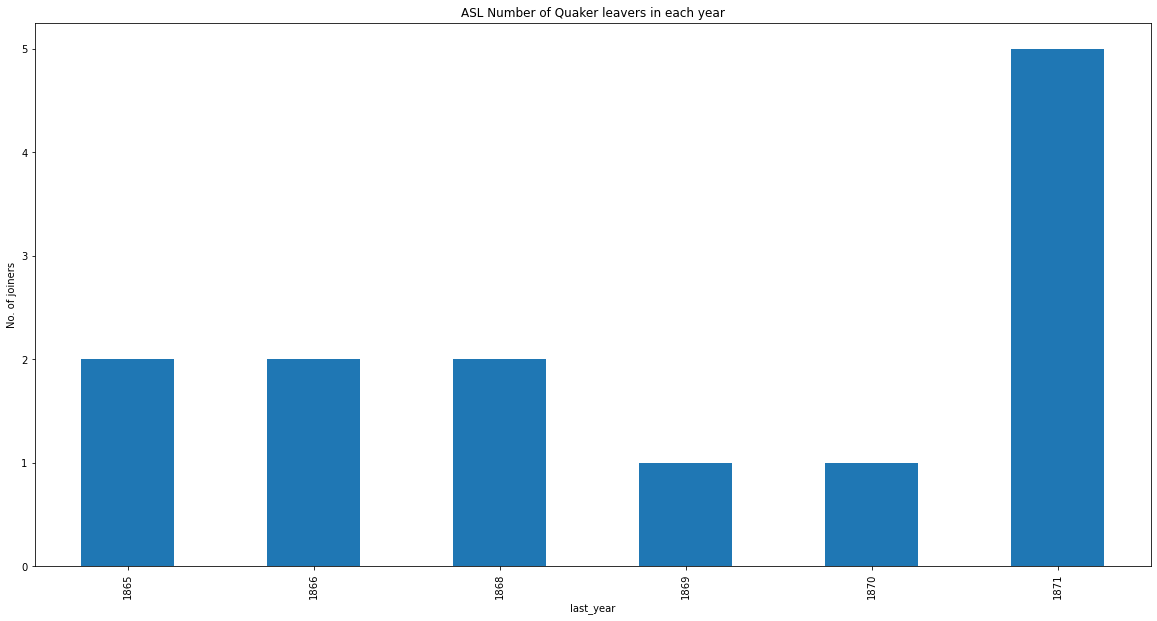

In [25]:
quaker_asl.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("ASL Number of Quaker leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 7.7.34 Show Quaker members of the AI #

In [26]:
quaker_ai

,Name,religion_name,ceda_name,first_year,last_year
0,William Spicer Wood,Quaker,AI,1863,1871
1,Jonathan Hutchinson,Quaker,AI,1863,1871
2,Charles Henry Fox,Quaker,AI,1861,1871
3,Robert Nicholas Fowler,Quaker,AI,1851,1871
4,Henry Crowley,Quaker,AI,1864,1871
5,William Bull,Quaker,AI,1867,1871
6,Antonio Brady,Quaker,AI,1864,1871
7,Edward Backhouse,Quaker,AI,1870,1871


# 7.7.35 Show Quaker joiners of the AI #

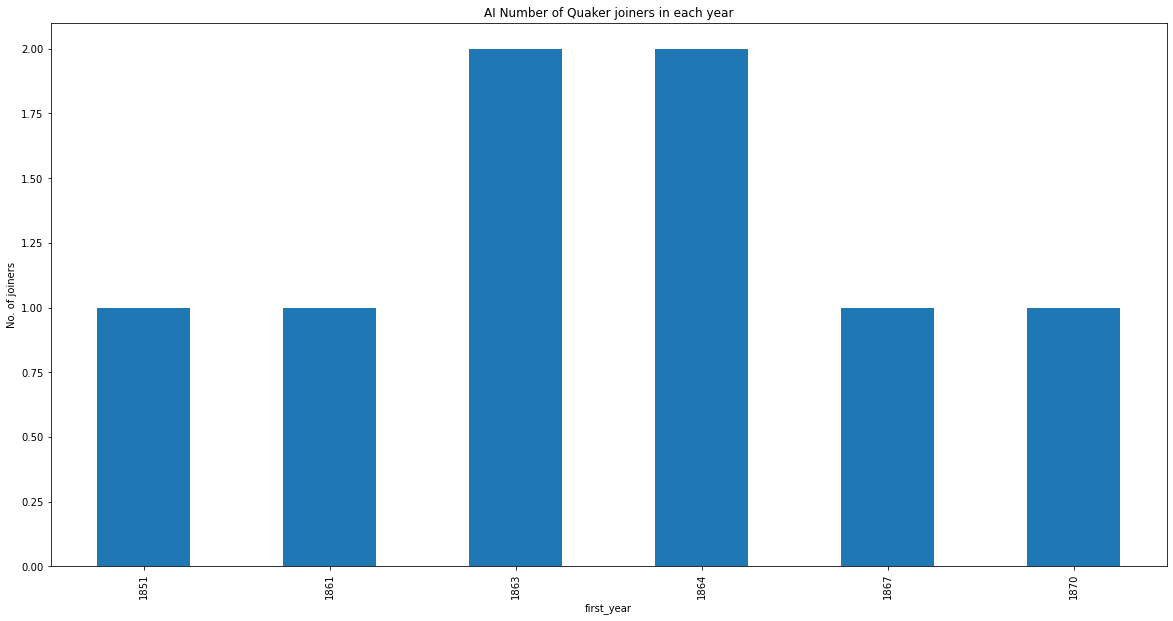

In [27]:
quaker_ai.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("AI Number of Quaker joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 7.7.36 Show Quaker joiners of the AI #

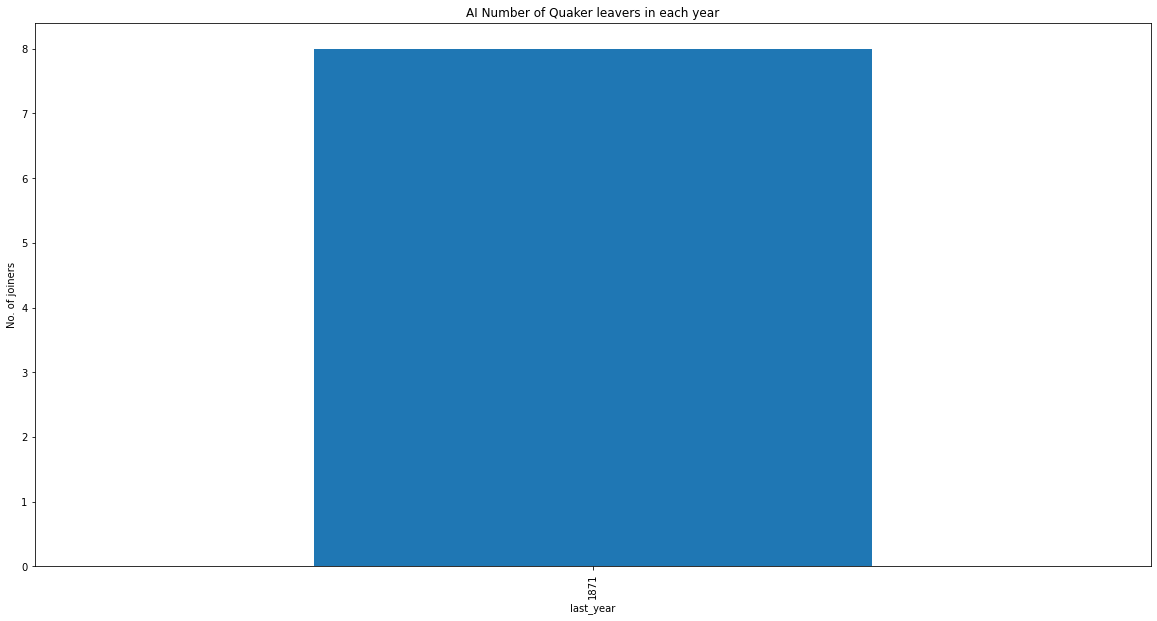

In [28]:
quaker_ai.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("AI Number of Quaker leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 7.7.37 Quaker CEDA members of Case Study Three Hodgkin's network #

 Note There are no 'first' and 'last' year data for this dummy CEDA 

In [29]:
quaker_hod

,Name,birth_year,death_year,religion_name,ceda_name
0,E T Wakefield,NaN,NaN,Quaker,HOD
1,John Ross,NaN,NaN,Quaker,HOD
2,J Robinson,NaN,NaN,Quaker,HOD
3,Joseph Lister,1827.0,1912.0,Quaker,HOD
4,Thomas (1) Hodgkin,1798.0,1866.0,Quaker,HOD
5,Thomas (1) Hodgkin,1798.0,1866.0,Quaker,HOD
6,Robert Nicholas Fowler,1828.0,1891.0,Quaker,HOD
7,Henry Christy,1810.0,1865.0,Quaker,HOD
8,James (1) Backhouse,1794.0,1869.0,Quaker,HOD
9,James (1) Backhouse,1794.0,1869.0,Quaker,HOD


# 7.7.38 Quaker CEDA members not in Case Study Three #

In [30]:
quaker_not_hod

,Name,religion_name,ceda_name,first_year,last_year
0,William Spicer Wood,Quaker,APS,1864,1867
1,William Spicer Wood,Quaker,ASL,1863,1871
2,William Spicer Wood,Quaker,AI,1863,1871
3,William Wilson,Quaker,APS,1838,1865
4,William Wilson,Quaker,ASL,1865,1866
...,...,...,...,...,...
634,Joshua Wilson,Quaker,APS,1860,1860
635,F Woodhead,Quaker,APS,1861,1862
636,W Woolston,Quaker,APS,1861,1861
637,Francis Wright,Quaker,APS,1838,1838


# END #